# Project 4 

## Team member: Randy Xia, Qihua Zhu

## Phase I

## Import modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Load and prepare the dataset

In [2]:
# load the dataset
mr_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)
mr_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


After review the dataset dictionary and study same information of mushroom online, we think the factor that could affect the ediability of certain kind of mushroom could be the surface and color of the cap, the color of the gill, the habitatm, and the odor of the mushroom.

In [3]:
# create a subset of 5 columns, including 'edible' + 'poisonous'
# use the 'copy()' function if you want to preserve the original data frame
mr_sub = mr_df.iloc[:, [0, 2, 3, 10, 5]].copy()

In [4]:
# check results: do we have the columns we want? Check the first 10 rows
mr_sub.head(10)

,0,2,3,10,5
0,p,s,n,e,p
1,e,s,y,e,a
2,e,s,w,e,l
3,p,y,w,e,p
4,e,s,g,t,n
5,e,y,y,e,a
6,e,s,w,e,a
7,e,y,w,e,l
8,p,y,w,e,p
9,e,s,y,e,a


Add the meaningful name for the columns of the sub-dataset.

In [5]:
# add meaningful column names
mr_sub.columns = ['Is_Poisonous','Cap_Surface', 'Cap_Color', 'Stalk_Shape' ,'Odor']

# sanity check
mr_sub.head(5)

,Is_Poisonous,Cap_Surface,Cap_Color,Stalk_Shape,Odor
0,p,s,n,e,p
1,e,s,y,e,a
2,e,s,w,e,l
3,p,y,w,e,p
4,e,s,g,t,n


Replace the single letter abbreviations used in the data with more descriptive character strings

In [6]:
# replace Is_Poisonous col values
mr_sub.Is_Poisonous.replace('e', '0', inplace = True)
mr_sub.Is_Poisonous.replace('p', '1', inplace = True)

# replace Cap Surface col values
mr_sub.Cap_Surface.replace('f', 'fibrous', inplace = True)
mr_sub.Cap_Surface.replace('g', 'grooves', inplace = True)
mr_sub.Cap_Surface.replace('y', 'scaly', inplace = True)
mr_sub.Cap_Surface.replace('s', 'smooth', inplace = True)

# replace Cap Color col values
mr_sub.Cap_Color.replace('n', 'brown', inplace = True)
mr_sub.Cap_Color.replace('b', 'buff', inplace = True)
mr_sub.Cap_Color.replace('c', 'cinnamon', inplace = True)
mr_sub.Cap_Color.replace('g', 'gray', inplace = True)
mr_sub.Cap_Color.replace('r', 'green', inplace = True)
mr_sub.Cap_Color.replace('p', 'pink', inplace = True)
mr_sub.Cap_Color.replace('u', 'purple', inplace = True)
mr_sub.Cap_Color.replace('e', 'red', inplace = True)
mr_sub.Cap_Color.replace('w', 'white', inplace = True)
mr_sub.Cap_Color.replace('y', 'yellow', inplace = True)


# replace Stalk Shape col values
mr_sub.Stalk_Shape.replace('e', 'enlarging', inplace = True)
mr_sub.Stalk_Shape.replace('t', 'tapering', inplace = True)


# replace Odor col values
mr_sub.Odor.replace('a', 'almond', inplace = True)
mr_sub.Odor.replace('l', 'anise', inplace = True)
mr_sub.Odor.replace('c', 'creosote', inplace = True)
mr_sub.Odor.replace('y', 'fishy', inplace = True)
mr_sub.Odor.replace('f', 'foul', inplace = True)
mr_sub.Odor.replace('m', 'musty', inplace = True)
mr_sub.Odor.replace('n', 'none', inplace = True)
mr_sub.Odor.replace('p', 'pungent', inplace = True)
mr_sub.Odor.replace('s', 'spicy', inplace = True)

mr_sub.head(10)


,Is_Poisonous,Cap_Surface,Cap_Color,Stalk_Shape,Odor
0,1,smooth,brown,enlarging,pungent
1,0,smooth,yellow,enlarging,almond
2,0,smooth,white,enlarging,anise
3,1,scaly,white,enlarging,pungent
4,0,smooth,gray,tapering,none
5,0,scaly,yellow,enlarging,almond
6,0,smooth,white,enlarging,almond
7,0,scaly,white,enlarging,anise
8,1,scaly,white,enlarging,pungent
9,0,smooth,yellow,enlarging,almond


In [7]:
mr_d = pd.get_dummies(mr_sub)
mr_d.head(5)

,Is_Poisonous_0,Is_Poisonous_1,Cap_Surface_fibrous,Cap_Surface_grooves,Cap_Surface_scaly,Cap_Surface_smooth,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,...,Stalk_Shape_tapering,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [8]:
mr_sub.describe()

,Is_Poisonous,Cap_Surface,Cap_Color,Stalk_Shape,Odor
count,8124,8124,8124,8124,8124
unique,2,4,10,2,9
top,0,scaly,brown,tapering,none
freq,4208,3244,2284,4608,3528


In [9]:
mr_d.describe()

,Is_Poisonous_0,Is_Poisonous_1,Cap_Surface_fibrous,Cap_Surface_grooves,Cap_Surface_scaly,Cap_Surface_smooth,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,...,Stalk_Shape_tapering,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.285574,0.000492,0.399311,0.314623,0.281142,0.020679,0.005416,0.226489,...,0.567208,0.049237,0.049237,0.023634,0.070901,0.265879,0.004431,0.434269,0.031512,0.070901
std,0.499708,0.499708,0.451715,0.022185,0.489787,0.464394,0.449584,0.142318,0.073399,0.418585,...,0.495493,0.216375,0.216375,0.151914,0.256675,0.441827,0.066425,0.495691,0.174706,0.256675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Pre_Processing

First, load the dataset we made proviously. 

In [10]:
# load dataset
mr_d.head(5)

,Is_Poisonous_0,Is_Poisonous_1,Cap_Surface_fibrous,Cap_Surface_grooves,Cap_Surface_scaly,Cap_Surface_smooth,Cap_Color_brown,Cap_Color_buff,Cap_Color_cinnamon,Cap_Color_gray,...,Stalk_Shape_tapering,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


## Data Exploration and Visualization

### We labeled the "poisonous" as "1", and the the "edible" as "0"

We find that there are 1,740 mushrooms with a scaly surface, 1,412 mushrooms with a smooth surface, and 760 mushrooms with fibrous mushroom are poisonous. Only 4 mushrooms with grooves surface are poisonous.

In [11]:
# Use groupby function to make a new dataframe.
mr_sub[mr_sub['Is_Poisonous'] == '1'].groupby('Cap_Surface').count()[['Is_Poisonous']].sort_values(by='Is_Poisonous', ascending=False, na_position='first')

,Is_Poisonous
Cap_Surface,
scaly,1740
smooth,1412
fibrous,760
grooves,4


According to the figure, we could find out that the mushrooms with scaly and smooth surface are likely to be poisonous.

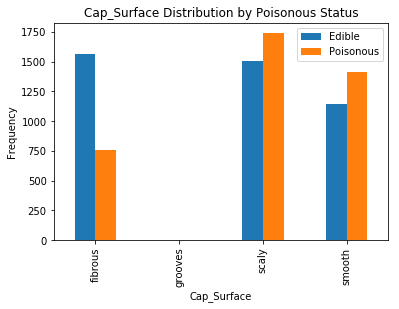

In [12]:
# Barplot of Cap_Surface grouped by Edible
pd.crosstab(mr_sub.Cap_Surface, mr_sub.Is_Poisonous).plot(kind='bar')
plt.title('Cap_Surface Distribution by Poisonous Status')
plt.xlabel('Cap_Surface')
plt.ylabel('Frequency')
plt.legend(["Edible", "Poisonous"])

According to the table below there are 1,020 brown, 876 red, 808 gray, 672 yellow,320 white, 120 buff, 88 pink, and 12 cinnamon mushrooms are poisonous. 

In [13]:
# Use groupby function to make a new dataframe.
mr_sub[mr_sub['Is_Poisonous'] == '1'].groupby('Cap_Color').count()[['Is_Poisonous']].sort_values(by='Is_Poisonous', ascending=False, na_position='first')

,Is_Poisonous
Cap_Color,
brown,1020
red,876
gray,808
yellow,672
white,320
buff,120
pink,88
cinnamon,12


According to the figure, we could find out that the mushrooms with red, buff, pink and yellow color are likely poisonous.

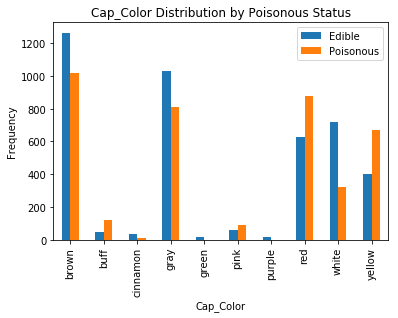

In [14]:
# Barplot of Cap_Color grouped by Edible
pd.crosstab(mr_sub.Cap_Color, mr_sub.Is_Poisonous).plot(kind='bar')
plt.title('Cap_Color Distribution by Poisonous Status')
plt.xlabel('Cap_Color')
plt.ylabel('Frequency')
plt.legend(["Edible", "Poisonous"])

Based on the table below, we find that there are 2,016 mushrooms with tapering stalk shape, and 1,900 mushrooms with enlaging stalk shape are poisonous.

In [15]:
# Use groupby function to make a new dataframe.
mr_sub[mr_sub['Is_Poisonous'] == '1'].groupby('Stalk_Shape').count()[['Is_Poisonous']].sort_values(by='Is_Poisonous', ascending=False, na_position='first')

,Is_Poisonous
Stalk_Shape,
tapering,2016
enlarging,1900


According to the figure, we could find out that the mushrooms with enlarging stalk shape are likely poisonous.

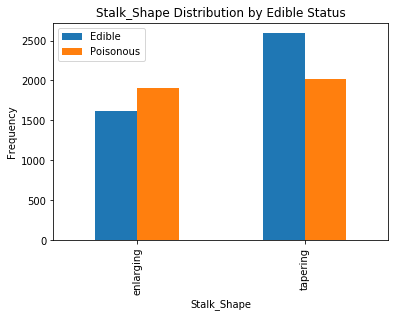

In [16]:
# Barplot of Stalk_Shape grouped by Is_Poisonous
pd.crosstab(mr_sub.Stalk_Shape, mr_sub.Is_Poisonous).plot(kind='bar')
plt.title('Stalk_Shape Distribution by Edible Status')
plt.xlabel('Stalk_Shape')
plt.ylabel('Frequency')
plt.legend(["Edible", "Poisonous"])

The table below shows that the mushrooms with the foul odor are more likely to be poisonous. The mushrooms with fishy and spicy smell seem to have equal possibility to be poisonous.
There are 256, 192, 120, and 36 mushrooms with pungent, creosote, none, and musty smells are poisonous.

In [17]:
# Use groupby function to make a new dataframe.
mr_sub[mr_sub['Is_Poisonous'] == '1'].groupby('Odor').count()[['Is_Poisonous']].sort_values(by='Is_Poisonous', ascending=False, na_position='first')

,Is_Poisonous
Odor,
foul,2160
fishy,576
spicy,576
pungent,256
creosote,192
none,120
musty,36


Based on the bar chart below, we find that the mushrooms with almond, anise, or no smell are more likely ediable.

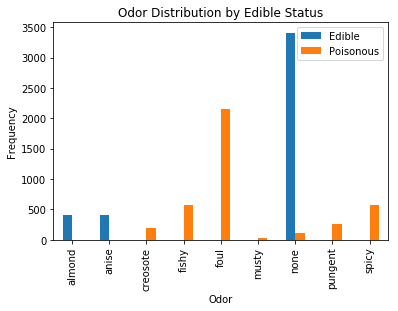

In [18]:
# Barplot of Odor grouped by Edible
pd.crosstab(mr_sub.Odor, mr_sub.Is_Poisonous).plot(kind='bar')
plt.title('Odor Distribution by Edible Status')
plt.xlabel('Odor')
plt.ylabel('Frequency')
plt.legend(["Edible", "Poisonous"])

## Conclusion for Exploratory Data Analysis

According to the data analysis we did above, we can conclude that:
- The Cap_surface would be a good predictor since the mushrooms with a scaly and smooth surface are likely **poisonous**, but the mushrooms with fibrous are likely **edible**. 


- The Cap_color would not be a good predictor. The mushrooms with red, buff, pink and yellow color are likely **poisonous**, while the mushrooms with green, purple, or gray are likely **edible**. However, we can't find any apparent laws exist as guidelines. For example, we can't say the mushroom with bright color is **poisonous** since green is intelligent but more likely **edible**. Alternatively, the mushroom with a dark color is **edible** since brown is dark color but **poisonous**.


- The Stalk_Shape is a good predictor. The mushrooms with enlarging stalk shape are likely **poisonous**, while the mushrooms with tapering stalk shape are likely **ediable**. 


- The odor is a good predictor. The mushrooms with almond, anise, or no smell are more likely **edible**, while others are not.

# Phase II

## Prepare Data for Logistic Regression

To prepare the data, we want to add dummy variables for Cap_Surface,Cap_Color, Stalk_Shape, and Odor, since we treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [19]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Surface_fibrous + Cap_Surface_grooves + Cap_Surface_scaly + Cap_Surface_smooth \
                 + Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray +Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow \
                 + Stalk_Shape_tapering + Stalk_Shape_enlarging \
                 + Odor_almond + Odor_anise + Odor_creosote + Odor_fishy + Odor_foul + + Odor_musty + Odor_none + Odor_pungent + Odor_spicy", mr_d, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'Cap_Surface_fibrous', 'Cap_Surface_grooves',
       'Cap_Surface_scaly', 'Cap_Surface_smooth', 'Cap_Color_brown',
       'Cap_Color_buff', 'Cap_Color_cinnamon', 'Cap_Color_gray',
       'Cap_Color_green', 'Cap_Color_pink', 'Cap_Color_purple',
       'Cap_Color_red', 'Cap_Color_white', 'Cap_Color_yellow',
       'Stalk_Shape_tapering', 'Stalk_Shape_enlarging', 'Odor_almond',
       'Odor_anise', 'Odor_creosote', 'Odor_fishy', 'Odor_foul', 'Odor_musty',
       'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


We also need to flatten "y" into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [20]:
# flatten y into a 1-D array
y = np.ravel(y)

## Logistic Regression


After the preparation above, we run logistic regression on the entire data set, and see how accurate it is.

In [21]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.9857213195470211

According to the analysis we did above, the accuracy is 98 percent. Now we want to know what's the null error rate?

In [22]:
# what percentage are poisonous?
y.mean()

0.48202855736090594

48% of the mushrooms in the dataset are poisonous, which means that you could obtain 52 percent accuracy by always predicting "edible." So we're doing better than the null error rate, but not by much.

Now we need to examine the coefficients for the dataset.

In [23]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))).sort_values(by=1, ascending=False, na_position='first')

,0,1
21,Odor_foul,[5.387938500546703]
25,Odor_spicy,[4.806231962048392]
20,Odor_fishy,[4.8062319620483915]
19,Odor_creosote,[2.5028069662352337]
24,Odor_pungent,[2.160006272020464]
14,Cap_Color_yellow,[1.764050929855902]
2,Cap_Surface_grooves,[1.645794263391393]
6,Cap_Color_buff,[1.4147328858046402]
10,Cap_Color_pink,[1.2741705710264006]
16,Stalk_Shape_enlarging,[1.1124177708554217]


According to the analysis,we can conclude that:
* The **Odor** could be a good predictor of whether the mushroom is edible or poisonous. The mushrooms with "good" smell, such as anise or almond, are **barely poisonous**. While the mushrooms with "pungent" smell such as foul, fishy, or spicy are more **likely poisonous**. Also, the slope number is either "5" or "-7", which can be easily distinguished. 


* The **Cap color** would not be a good predictor of whether a mushroom is edible. Difference between the max and min slope number is only 3.11 (1.76-(-1.35)) which is hard to be distinguished.


* The **Stalk shape** is a good predictor since there are only to category and the table above shows that the mushroom with **enlarging stalk shape** is more likely **poisonous**, while the mushroom with **tapering stalk shape** is more likely **edible**


* The **Cap surface** is not a good predictor. The result from the scikit-learn analysis shows that the mushroom with **scaly, smooth, and fibrous** are more likely **edible**, while the mushroom with the **groover cap surface** is more likely **poisonous**. The result from the scikit-learn analysis is inconsistent with the Exploratory analysis.

## Model Evaluation Using a Validation Set

To evaluate our model, we decide to split the data into a training set and a testing set.

In [24]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities and take a look of it.

In [25]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 1. 1. 1.]


In [26]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.01144801 0.98855199]
 [0.99479786 0.00520214]
 [0.95135337 0.04864663]
 ...
 [0.00467728 0.99532272]
 [0.00849431 0.99150569]
 [0.00860966 0.99139034]]


In [27]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.9868744872846595
0.9993230633138074


In [28]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[1272    0]
 [  32 1134]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1272
         1.0       1.00      0.97      0.99      1166

   micro avg       0.99      0.99      0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



The result from the model Evaluation using a validation set shows that the  accuracy is 98%, which is the same as we experienced when training and predicting on the same data.  

## Model Evaluation Using Cross-Validation

Now we do 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [29]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[1.         0.99876999 0.99507995 0.98769988 0.94341943 0.93726937
 1.         1.         0.88039457 0.99506782]
0.9737701014494732


Since the 10-fold cross-validation shows the 98% accuracy, we can conclude our model is efficient. We'll have other processes to test the accuracy of our model.

## Factor Analysis

Since the accuracy of our model is 98 percent which might seems overfitting, We need to test the accuracy of our model by removing the factors.

In [30]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Surface_fibrous + Cap_Surface_grooves + Cap_Surface_scaly + Cap_Surface_smooth \
                 + Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray +Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow \
                 + Stalk_Shape_tapering + Stalk_Shape_enlarging ", mr_d, return_type="dataframe")
print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Surface_fibrous', 'Cap_Surface_grooves',
       'Cap_Surface_scaly', 'Cap_Surface_smooth', 'Cap_Color_brown',
       'Cap_Color_buff', 'Cap_Color_cinnamon', 'Cap_Color_gray',
       'Cap_Color_green', 'Cap_Color_pink', 'Cap_Color_purple',
       'Cap_Color_red', 'Cap_Color_white', 'Cap_Color_yellow',
       'Stalk_Shape_tapering', 'Stalk_Shape_enlarging'],
      dtype='object')


0.5918266863613983

In [31]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Surface_fibrous + Cap_Surface_grooves + Cap_Surface_scaly + Cap_Surface_smooth \
                 + Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray +Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow", mr_d, return_type="dataframe")
print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Surface_fibrous', 'Cap_Surface_grooves',
       'Cap_Surface_scaly', 'Cap_Surface_smooth', 'Cap_Color_brown',
       'Cap_Color_buff', 'Cap_Color_cinnamon', 'Cap_Color_gray',
       'Cap_Color_green', 'Cap_Color_pink', 'Cap_Color_purple',
       'Cap_Color_red', 'Cap_Color_white', 'Cap_Color_yellow'],
      dtype='object')


0.6011816838995568

In [32]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Surface_fibrous + Cap_Surface_grooves + Cap_Surface_scaly + Cap_Surface_smooth \
                 + Stalk_Shape_tapering + Stalk_Shape_enlarging ", mr_d, return_type="dataframe")
print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Surface_fibrous', 'Cap_Surface_grooves',
       'Cap_Surface_scaly', 'Cap_Surface_smooth', 'Stalk_Shape_tapering',
       'Stalk_Shape_enlarging'],
      dtype='object')


0.5805022156573116

In [33]:
y, X = dmatrices("Is_Poisonous_1 ~ + Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray +Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow \
                 + Stalk_Shape_tapering + Stalk_Shape_enlarging ", mr_d, return_type="dataframe")
print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Stalk_Shape_tapering', 'Stalk_Shape_enlarging'],
      dtype='object')


0.6302314130969966

In [34]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Surface_fibrous + Cap_Surface_grooves + Cap_Surface_scaly + Cap_Surface_smooth", mr_d, return_type="dataframe")

print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Surface_fibrous', 'Cap_Surface_grooves',
       'Cap_Surface_scaly', 'Cap_Surface_smooth'],
      dtype='object')


0.5805022156573116

In [35]:
y, X = dmatrices("Is_Poisonous_1 ~ Stalk_Shape_tapering + Stalk_Shape_enlarging", mr_d, return_type="dataframe")
print(X.columns)
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Stalk_Shape_tapering', 'Stalk_Shape_enlarging'], dtype='object')


0.5529295913343181

In [36]:
y, X = dmatrices("Is_Poisonous_1 ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon + Cap_Color_gray +Cap_Color_green + Cap_Color_pink + Cap_Color_purple + Cap_Color_red + Cap_Color_white + Cap_Color_yellow", mr_d, return_type="dataframe")
print(X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow'],
      dtype='object')


0.5952732644017725

In [37]:
y, X = dmatrices("Is_Poisonous_1 ~Odor_almond + Odor_anise + Odor_creosote + Odor_fishy + Odor_foul + + Odor_musty + Odor_none + Odor_pungent + Odor_spicy", mr_d, return_type="dataframe")
print(X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


0.9852289512555391

Based on the factor analysis, we find that: 
* The odor is the most accurate predictor(98.5) of whether the mushroom is edible or poisonous among all factors in our model. 
* The model only contains Cap_color has 59 percent accuracy, the model only contains Cap_surface has 58 percent accuracy, and the model only contains Stalk_Shape has 55 percent accuracy.

* The module contains the combination of Cap_Color, and Stalk_Shape factor would have 63 percent accuracy is the highest accuracy among all two-two factor combination model.

In general, using Odor to predict whether the mushroom is poisonous or not is the most effective way and has 0.985 accuracy rate.